In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [ ]:
# uploading iris data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data)

# normalize the dataset
max_val=max(data.max())
data =data/max_val

data.columns = iris.feature_names
data['target'] = iris.target

# number of classes
print("number of classes",len(pd.unique(data['target'])))
train, validate, test = np.split(data.sample(frac=1 ,random_state=42),[int(.6*len(data)), int(.8*len(data))])

#Trainig dataset
train_X =  train.drop('target',axis='columns').values
train_Y = train['target'].values

#validate dataset
validate_X =validate.drop('target',axis='columns').values
validate_Y = validate['target'].values

#test dataset
test_X =test.drop('target',axis='columns').values
test_Y = test['target'].values




number of classes 3


In [ ]:
# one hot encoding here number of classes is three
def oneHotEncoding(Y):
  y1 = []
  y2 = []
  y3 = []
  
  for i in range(0 , len(Y)):
    if (Y[i] == 0):
      y1.append(1)
      y2.append(0)
      y3.append(0)
     
    elif (Y[i] == 1):
      y1.append(0)
      y2.append(1)
      y3.append(0)
    
    else :
      y1.append(0)
      y2.append(0)
      y3.append(1)
    
  return y1 ,y2 ,y3

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def train_MLP(X , y1 , y2 , y3 , epoch, alpha , rho):

  number_of_features = len(X[0])
  
  w1 = np.ones([number_of_features + 1 , number_of_features ])*0.1
  b1 = np.ones(number_of_features + 1)*0.1
  w2 =  np.ones([3 , number_of_features + 1])*0.1
  b2 = np.ones(3)*0.1
  
  error = []
  for i in range(epoch ):
    errorItr = 0
    for j in range(len(X)):
      h = []
      d = []
      del1 = []
      del2 = []
      for k in range(len(w1)):
        v = np.dot(w1[k] , np.array(X[j])) + b1[k]
        h.append(sigmoid(v))
      
      for k in range(len(w2)) :
        O = np.dot(w2[k] , np.array(h)) + b2[k]
        d.append(sigmoid(O))
      
      del2.append( d[0] * ( 1- d[0]) * (y1[j] - d[0]))
      del2.append( d[1] * ( 1- d[1]) * (y2[j] - d[1]))
      del2.append( d[2] * ( 1- d[2]) * (y3[j] - d[2]))
     
      for k in range(len(h)):
        del1.append(float(w2[0][k]*del2[0] + w2[1][k]*del2[1] + w2[2][k]*del2[2])* (float)(h[k]) * (float)(1 - h[k]))
       
      # weight updation 
      for k in range(len(w2)):
        b2[k] = b2[k] + alpha * del2[k]
        for l in range(len(w2[0])):
          w2[k][l] = w2[k][l] + alpha * del2[k] * h[l]
   
      for k in range(len(w1)):
        b1[k] = b1[k] + alpha * del1[k]
        for l in range(len(w1[0])):
          w1[k][l] = w1[k][l] + alpha * del1[k] * X[j][l]
      
      errorItr += (y1[j] - d[0])*(y1[j] - d[0]) + (y2[j] - d[1])*(y2[j] - d[1]) + (y3[j] - d[2])*(y3[j] - d[2])
    error.append(errorItr/len(X));  
    if (errorItr < rho):
      return w1, b1, w2 , b2, error
   
    
  return  w1 , b1, w2 , b2 , error   
  

In [ ]:
def predict_Y(w1 , b1 , w2 , b2  , X):
  y = []
  
  for j in range(len(X)):
    h = []
    d = []
    for k in range(len(w1)):
      v = np.dot(w1[k] , np.array(X[j])) + b1[k]
      h.append(sigmoid(v))
    
    for k in range(len(w2)) :
      O = np.dot(w2[k] , np.array(h)) + b2[k]
      d.append(sigmoid(O))
    
    if(d[0] > d[1] and d[0] > d[2]):
      y.append(0)

    elif(d[1] > d[0] and d[1] > d[2]):
      y.append(1)

    else:
      y.append(2) 
    
  return y


In [ ]:
y1 , y2 , y3 = oneHotEncoding(train_Y)
y_val1 , y_val2 , y_val3 = oneHotEncoding(validate_Y)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

w1 , b1 , w2, b2 ,error1   = train_MLP(train_X , y1 , y2, y3, 1000, 0.1 , 0.001)

y_predicted = predict_Y(w1 , b1, w2 , b2, test_X)
y_predicted = np.array(y_predicted)

print(y_predicted)
print(test_Y)
print(accuracy_score(y_predicted , test_Y))


[1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
[1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
1.0


In [ ]:
w_a11 , b_a11 , w_a12, b_a12 ,error_a1   = train_MLP(train_X , y1 , y2, y3, 10, 0.1 , 0.001)
w_a21 , b_a21 , w_a22  , b_a22 ,error_a2 = train_MLP( validate_X, y_val1 , y_val2, y_val3, 10, 0.1 , 0.001)
print(min(error_a1))
print(min(error_a2))

0.6694707848055598
0.6650556738624428


In [ ]:
w_b11 , b_b11 , w_b12, b_b12 ,error_b1   = train_MLP(train_X , y1 , y2, y3, 100, 0.1 , 0.001)
w_b21 , b_b21 , w_b22  , b_b22 ,error_b2 = train_MLP( validate_X, y_val1 , y_val2, y_val3, 100, 0.1 , 0.001)
print(min(error_b1))
print(min(error_b2))

0.5551445050669311
0.6566367698028106


In [ ]:
w_c11 , b_c11 , w_c12, b_c12 ,error_c1   = train_MLP(train_X , y1 , y2, y3, 100, 0.01 , 0.001)
w_c21 , b_c21 , w_c22  , b_c22 ,error_c2 = train_MLP( validate_X, y_val1 , y_val2, y_val3, 100, 0.01 , 0.001)
print(min(error_c1))
print(min(error_c2))

0.662497243233794
0.6575371537039533


In [ ]:
w_d11 , b_d11 , w_d12, b_d12 ,error_d1   = train_MLP(train_X , y1 , y2, y3, 1000, 0.01 , 0.001)
w_d21 , b_d21 , w_d22  , b_d22 ,error_d2 = train_MLP( validate_X, y_val1 , y_val2, y_val3, 1000, 0.01 , 0.001)
print(min(error_d1))
print(min(error_d2))

0.5071225206430943
0.647973790293617


In [ ]:
w_e11 , b_e11 , w_e12, b_e12 ,error_e1   = train_MLP(train_X , y1 , y2, y3, 1000, 0.001 , 0.0001)
w_e21 , b_e21 , w_e22  , b_e22 ,error_e2 = train_MLP( validate_X, y_val1 , y_val2, y_val3, 1000, 0.001 , 0.0001)
print(min(error_a1))
print(min(error_a2))

0.6694707848055598
0.6650556738624428


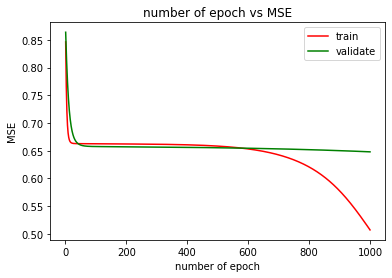

In [ ]:
# Overfitting Checking
import matplotlib.pyplot as plt
import math
  
X = list(range(1, 1001))
plt.plot(X, error_d1, color='r', label='train')
plt.plot(X,error_d2, color='g', label='validate')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("number of epoch")
plt.ylabel("MSE")
plt.title("number of epoch vs MSE")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


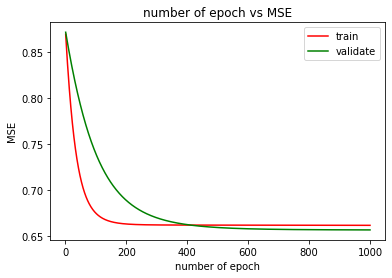

In [ ]:
import matplotlib.pyplot as plt
import math
  
X = list(range(1, 1001))
plt.plot(X, error_e1, color='r', label='train')
plt.plot(X,error_e2, color='g', label='validate')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("number of epoch")
plt.ylabel("MSE")
plt.title("number of epoch vs MSE")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# k fold variation
from sklearn.model_selection import KFold
def fold(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  print(kf)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  return all_x_train, all_x_test, all_y_train, all_y_test

In [ ]:
# using K fold validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

wine = datasets.load_wine()
data = pd.DataFrame(wine.data)

# normalize the dataset
max_val=max(data.max())
data =data/max_val

data.columns = wine.feature_names
data
wine.target.shape
data['target'] = wine.target

y_actual = np.array(wine.target)
features = np.array(data.drop('target',axis='columns').values)
all_x_train, all_x_test, all_y_train, all_y_test = fold(features , y_actual)

all_x_train = np.array(all_x_train)
all_x_test = np.array(all_x_test)
all_y_train = np.array(all_y_train)
all_y_test = np.array(all_y_test)


for i in range(0 , 5):

  y1 , y2 , y3 = oneHotEncoding(all_y_train[i])
  w1 , b1 , w2, b2 ,error1   = train_MLP(all_x_train[i] , y1 , y2, y3, 1000, 0.1 , 0.001)
  y_predicted = predict_Y(w1 , b1,  w2 , b2 , all_x_test[i])
  y_predicted = np.array(y_predicted)

  y_predicted1 , y_predicted2 , y_predicted3 = oneHotEncoding(y_predicted)  
  y_predicted1 = np.array(y_predicted1)
  y_predicted2 = np.array(y_predicted2)
  y_predicted3 = np.array(y_predicted3)
  
  test_y1 , test_y2 , test_y3 = oneHotEncoding(all_y_test[i])
  test_y1 = np.array(test_y1)
  test_y3 = np.array(test_y2)
  test_y3 = np.array(test_y3)
  print("For First Class accuracy is {} ,  recall is {} , precision is {} ".format(accuracy_score(y_predicted1 , test_y1) ,recall_score(y_predicted1 , test_y1) , precision_score(y_predicted1 , test_y1)))
  print("For Second Class accuracy is {} ,  recall is {} , precision is {} ".format(accuracy_score(y_predicted2 , test_y2) ,recall_score(y_predicted2 , test_y2) , precision_score(y_predicted2 , test_y2)))
  print("For Third Class accuracy is {} ,  recall is {} , precision is {} ".format(accuracy_score(y_predicted3 , test_y3) ,recall_score(y_predicted3 , test_y3) , precision_score(y_predicted3 , test_y3)))

  print("overall accuracy is {}".format(accuracy_score(y_predicted , all_y_test[i])))
  print(" ")

KFold(n_splits=5, random_state=1000, shuffle=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


For First Class accuracy is 0.9444444444444444 ,  recall is 0.8181818181818182 , precision is 1.0 
For Second Class accuracy is 0.6944444444444444 ,  recall is 0.7333333333333333 , precision is 0.6111111111111112 
For Third Class accuracy is 0.5 ,  recall is 0.5 , precision is 0.2777777777777778 
overall accuracy is 0.6944444444444444
 
For First Class accuracy is 0.8333333333333334 ,  recall is 0.75 , precision is 0.75 
For Second Class accuracy is 0.8611111111111112 ,  recall is 0.8 , precision is 0.8571428571428571 
For Third Class accuracy is 0.4166666666666667 ,  recall is 0.1111111111111111 , precision is 0.07142857142857142 
overall accuracy is 0.7222222222222222
 
For First Class accuracy is 0.9166666666666666 ,  recall is 0.7272727272727273 , precision is 1.0 
For Second Class accuracy is 0.6388888888888888 ,  recall is 0.5217391304347826 , precision is 0.8571428571428571 
For Third Class accuracy is 0.6111111111111112 ,  recall is 0.5 , precision is 0.07142857142857142 
overa